<a href="https://colab.research.google.com/github/ysaianusha/Term-Project/blob/main/ML_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experimenting on Dataset and perfomring Data Processing:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/soybean_data_soilgrid250_modified_states_9.csv")

In [ ]:
df.head(-1)

,loc_ID,year,yield,W_1_1,W_1_2,W_1_3,W_1_4,W_1_5,W_1_6,W_1_7,W_1_8,W_1_9,W_1_10,W_1_11,W_1_12,W_1_13,W_1_14,W_1_15,W_1_16,W_1_17,W_1_18,W_1_19,W_1_20,W_1_21,W_1_22,W_1_23,W_1_24,W_1_25,W_1_26,W_1_27,W_1_28,W_1_29,W_1_30,W_1_31,W_1_32,W_1_33,W_1_34,W_1_35,W_1_36,W_1_37,...,ocs_mean_60-100cm,ocs_mean_100-200cm,phh2o_mean_0-5cm,phh2o_mean_5-15cm,phh2o_mean_15-30cm,phh2o_mean_30-60cm,phh2o_mean_60-100cm,phh2o_mean_100-200cm,sand_mean_0-5cm,sand_mean_5-15cm,sand_mean_15-30cm,sand_mean_30-60cm,sand_mean_60-100cm,sand_mean_100-200cm,silt_mean_0-5cm,silt_mean_5-15cm,silt_mean_15-30cm,silt_mean_30-60cm,silt_mean_60-100cm,silt_mean_100-200cm,soc_mean_0-5cm,soc_mean_5-15cm,soc_mean_15-30cm,soc_mean_30-60cm,soc_mean_60-100cm,soc_mean_100-200cm,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,P_11,P_12,P_13,P_14
0,0,1980,32.5,0.274725,0.000000,1.615385,0.395604,0.967033,0.736264,1.153846,0.351648,0.615385,0.978022,1.868132,3.175824,6.472527,1.736264,5.505495,0.648352,0.000000,0.000000,1.153846,8.769231,1.659341,7.527473,5.000000,1.384615,0.472527,0.791209,6.989011,0.021978,2.241758,2.538462,0.362637,6.175824,10.252747,0.923077,6.318681,11.428571,4.065934,...,57.735324,57.735324,62.645905,62.449185,59.849164,57.664487,58.520710,63.943943,82.025226,77.579051,75.449081,71.287968,74.635108,103.985570,616.612997,609.275407,589.619433,551.298038,542.602408,531.980380,282.286500,159.583480,104.991802,72.170593,36.379682,20.656740,0.0,0.0,0.0,29.0,22.0,22.0,0.0,23.0,3.0,0.0,0.0,0.0,0.0,0.0
1,0,1981,36.0,0.604396,0.000000,0.043956,0.000000,0.857143,1.824176,0.000000,2.340659,1.285714,1.263736,0.000000,0.197802,1.593407,0.670330,11.934066,5.417582,2.241758,1.450549,7.120879,14.703297,3.505495,2.648352,1.670330,8.010989,9.439560,5.571429,15.417582,4.758242,8.340659,19.296703,0.571429,2.087912,2.395604,0.879121,5.538462,1.516484,1.131868,...,57.735324,57.735324,62.645905,62.449185,59.849164,57.664487,58.520710,63.943943,82.025226,77.579051,75.449081,71.287968,74.635108,103.985570,616.612997,609.275407,589.619433,551.298038,542.602408,531.980380,282.286500,159.583480,104.991802,72.170593,36.379682,20.656740,0.0,0.0,0.0,7.0,1.0,13.0,15.0,27.0,15.0,10.0,6.0,4.0,0.0,0.0
2,0,1982,37.0,2.098901,0.384615,1.681319,0.527473,6.340659,1.593407,1.868132,1.395604,4.076923,1.362637,5.604396,3.296703,1.483516,5.857143,0.923077,5.692308,0.329670,0.945055,0.439560,5.329670,8.714286,4.351648,9.483516,2.461538,3.065934,3.956044,12.560440,3.131868,8.835165,0.791209,0.000000,5.483516,2.032967,1.956044,7.769231,0.626374,2.406593,...,57.735324,57.735324,62.645905,62.449185,59.849164,57.664487,58.520710,63.943943,82.025226,77.579051,75.449081,71.287968,74.635108,103.985570,616.612997,609.275407,589.619433,551.298038,542.602408,531.980380,282.286500,159.583480,104.991802,72.170593,36.379682,20.656740,0.0,0.0,14.0,31.0,22.0,13.0,2.0,8.0,5.0,3.0,1.0,1.0,0.0,0.0
3,0,1983,23.0,0.000000,0.000000,0.000000,1.032967,4.373626,0.351648,0.263736,0.000000,0.000000,3.868132,0.098901,1.879121,7.076923,11.219780,3.571429,0.879121,2.406593,9.406593,2.098901,2.560440,4.219780,3.318681,0.340659,0.791209,0.780220,0.637363,1.494505,0.000000,0.000000,0.131868,2.912088,0.263736,0.000000,4.505495,1.560440,0.076923,8.901099,...,57.735324,57.735324,62.645905,62.449185,59.849164,57.664487,58.520710,63.943943,82.025226,77.579051,75.449081,71.287968,74.635108,103.985570,616.612997,609.275407,589.619433,551.298038,542.602408,531.980380,282.286500,159.583480,104.991802,72.170593,36.379682,20.656740,0.0,0.0,0.0,5.0,16.0,24.0,22.0,14.0,16.0,2.0,1.0,0.0,0.0,0.0
4,0,1984,28.5,0.000000,0.043956,0.197802,0.461538,0.142857,0.670330,4.615385,1.197802,1.109890,1.758242,8.329670,5.351648,3.252747,2.868132,4.945055,3.098901,2.956044,6.010989,0.142857,3.527473,12.439560,1.901099,10.483516,1.868132,0.329670,1.560440,3.296703,2.912088,8.285714,5.351648,0.000000,0.000000,2.054945,0.021978,0.307692,1.021978,13.450549,...,57.735324,57.735324,62.645905,62.449185,59.849164,57.664487,58.520710,63.943943,82.025226,77.579051,75.449081

In [ ]:
#df[df["year"]>2015]

In [ ]:
#removing the yeild and loc_ID from the dataframe
from sklearn.model_selection import train_test_split
y = df['yield']
x = df.drop(['yield','loc_ID'],axis=1)
x_years = x["year"]
x = x.drop(['year'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
#x.head(100)

In [ ]:
#y.head(-1)

In [ ]:
#x_train.head(-1)

In [ ]:
#y_train.head(-1)

In [ ]:
#y_test.head(-1)

In [ ]:
#x_test.head(-1)

In [ ]:
#converting the dataframe into array-like data
#columns_to_scale = df.columns.tolist()
#print(columns_to_scale)
#columns_to_scale = [i for i in columns_to_scale if i != 'yield']

In [ ]:
#df.describe()

In [ ]:
#nomralizing the data using sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training dataset, it will learn the parameters
scaler = MinMaxScaler()


norm_scaler_x = scaler.fit(x)
#norm_scaler_y = scaler.fit([y])
print(norm_scaler_x)
#print(norm_scaler_y)

MinMaxScaler()


In [ ]:
#x.describe()

In [ ]:
# transform x features
x_scaled = norm_scaler_x.transform(x)

#converting the numpy array to data frame
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

In [ ]:
# tranform test and train datasets

x_train_scaled = norm_scaler_x.transform(x_train)
#y_scaled = norm_scaler_y.transform([y])

In [ ]:
x_test_scaled = norm_scaler_x.transform(x_test)

In [ ]:
#norm_scaler_x.data_max_

In [ ]:
# the x_scaled is in the form of multidimentional array. We'll convert this to DataFrame
x_train_scaled

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)

In [ ]:
#simillarly converting testing dataset
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [ ]:
#adding back year to x_scaled dataframe
x_train_scaled.insert(0, "year", x_years, True)
#x_train_scaled['year'] = x_years
#print(x_years)
x_test_scaled.insert(0, "year", x_years, True)
#x_test_scaled['year'] = x_years

#now you can see the data is scaled between 0 and 1
x_train_scaled.columns
x_test_scaled.columns

Index(['year', 'W_1_1', 'W_1_2', 'W_1_3', 'W_1_4', 'W_1_5', 'W_1_6', 'W_1_7',
       'W_1_8', 'W_1_9',
       ...
       'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13',
       'P_14'],
      dtype='object', length=393)

In [ ]:
#x_test_scaled.describe()

In [ ]:
x_train_scaled.shape, y_train.shape

((20276, 393), (20276,))

In [ ]:
x_test_scaled.shape, y_test.shape

((5069, 393), (5069,))

**Data Visualization using *Seaborn*** 

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


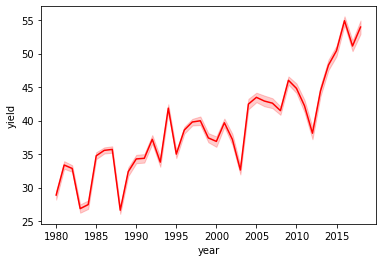

In [ ]:
# line graph to show average crop yield in different years
# Since, the data is continuous we are ploting a line graph
sns.lineplot(x='year',y='yield',data=df,color='red')

In [ ]:
cols = []
for i in df.columns:
  cols.append(i)

In [ ]:
print(cols)

['loc_ID', 'year', 'yield', 'W_1_1', 'W_1_2', 'W_1_3', 'W_1_4', 'W_1_5', 'W_1_6', 'W_1_7', 'W_1_8', 'W_1_9', 'W_1_10', 'W_1_11', 'W_1_12', 'W_1_13', 'W_1_14', 'W_1_15', 'W_1_16', 'W_1_17', 'W_1_18', 'W_1_19', 'W_1_20', 'W_1_21', 'W_1_22', 'W_1_23', 'W_1_24', 'W_1_25', 'W_1_26', 'W_1_27', 'W_1_28', 'W_1_29', 'W_1_30', 'W_1_31', 'W_1_32', 'W_1_33', 'W_1_34', 'W_1_35', 'W_1_36', 'W_1_37', 'W_1_38', 'W_1_39', 'W_1_40', 'W_1_41', 'W_1_42', 'W_1_43', 'W_1_44', 'W_1_45', 'W_1_46', 'W_1_47', 'W_1_48', 'W_1_49', 'W_1_50', 'W_1_51', 'W_1_52', 'W_2_1', 'W_2_2', 'W_2_3', 'W_2_4', 'W_2_5', 'W_2_6', 'W_2_7', 'W_2_8', 'W_2_9', 'W_2_10', 'W_2_11', 'W_2_12', 'W_2_13', 'W_2_14', 'W_2_15', 'W_2_16', 'W_2_17', 'W_2_18', 'W_2_19', 'W_2_20', 'W_2_21', 'W_2_22', 'W_2_23', 'W_2_24', 'W_2_25', 'W_2_26', 'W_2_27', 'W_2_28', 'W_2_29', 'W_2_30', 'W_2_31', 'W_2_32', 'W_2_33', 'W_2_34', 'W_2_35', 'W_2_36', 'W_2_37', 'W_2_38', 'W_2_39', 'W_2_40', 'W_2_41', 'W_2_42', 'W_2_43', 'W_2_44', 'W_2_45', 'W_2_46', 'W_2_47', 

In [ ]:
# bringing up the column names to their respective domain
# the given factors have been measured for all the 52 weeks in a year
precipitation = ['W_1_1', 'W_1_2', 'W_1_3', 'W_1_4', 'W_1_5', 'W_1_6', 'W_1_7', 'W_1_8', 'W_1_9', 'W_1_10', 'W_1_11', 'W_1_12', 'W_1_13', 'W_1_14', 'W_1_15', 'W_1_16', 'W_1_17', 'W_1_18', 'W_1_19', 'W_1_20', 'W_1_21', 'W_1_22', 'W_1_23', 'W_1_24', 'W_1_25', 'W_1_26', 'W_1_27', 'W_1_28', 'W_1_29', 'W_1_30', 'W_1_31', 'W_1_32', 'W_1_33', 'W_1_34', 'W_1_35', 'W_1_36', 'W_1_37', 'W_1_38', 'W_1_39', 'W_1_40', 'W_1_41', 'W_1_42', 'W_1_43', 'W_1_44', 'W_1_45', 'W_1_46', 'W_1_47', 'W_1_48', 'W_1_49', 'W_1_50', 'W_1_51', 'W_1_52']
solar_radiations = ['W_2_1', 'W_2_2', 'W_2_3', 'W_2_4', 'W_2_5', 'W_2_6', 'W_2_7', 'W_2_8', 'W_2_9', 'W_2_10', 'W_2_11', 'W_2_12', 'W_2_13', 'W_2_14', 'W_2_15', 'W_2_16', 'W_2_17', 'W_2_18', 'W_2_19', 'W_2_20', 'W_2_21', 'W_2_22', 'W_2_23', 'W_2_24', 'W_2_25', 'W_2_26', 'W_2_27', 'W_2_28', 'W_2_29', 'W_2_30', 'W_2_31', 'W_2_32', 'W_2_33', 'W_2_34', 'W_2_35', 'W_2_36', 'W_2_37', 'W_2_38', 'W_2_39', 'W_2_40', 'W_2_41', 'W_2_42', 'W_2_43', 'W_2_44', 'W_2_45', 'W_2_46', 'W_2_47', 'W_2_48', 'W_2_49', 'W_2_50', 'W_2_51', 'W_2_52']
snow_water = ['W_3_1', 'W_3_2', 'W_3_3', 'W_3_4', 'W_3_5', 'W_3_6', 'W_3_7', 'W_3_8', 'W_3_9', 'W_3_10', 'W_3_11', 'W_3_12', 'W_3_13', 'W_3_14', 'W_3_15', 'W_3_16', 'W_3_17', 'W_3_18', 'W_3_19', 'W_3_20', 'W_3_21', 'W_3_22', 'W_3_23', 'W_3_24', 'W_3_25', 'W_3_26', 'W_3_27', 'W_3_28', 'W_3_29', 'W_3_30', 'W_3_31', 'W_3_32', 'W_3_33', 'W_3_34', 'W_3_35', 'W_3_36', 'W_3_37', 'W_3_38', 'W_3_39', 'W_3_40', 'W_3_41', 'W_3_42', 'W_3_43', 'W_3_44', 'W_3_45', 'W_3_46', 'W_3_47', 'W_3_48', 'W_3_49', 'W_3_50', 'W_3_51', 'W_3_52']
max_temp = ['W_4_1', 'W_4_2', 'W_4_3', 'W_4_4', 'W_4_5', 'W_4_6', 'W_4_7', 'W_4_8', 'W_4_9', 'W_4_10', 'W_4_11', 'W_4_12', 'W_4_13', 'W_4_14', 'W_4_15', 'W_4_16', 'W_4_17', 'W_4_18', 'W_4_19', 'W_4_20', 'W_4_21', 'W_4_22', 'W_4_23', 'W_4_24', 'W_4_25', 'W_4_26', 'W_4_27', 'W_4_28', 'W_4_29', 'W_4_30', 'W_4_31', 'W_4_32', 'W_4_33', 'W_4_34', 'W_4_35', 'W_4_36', 'W_4_37', 'W_4_38', 'W_4_39', 'W_4_40', 'W_4_41', 'W_4_42', 'W_4_43', 'W_4_44', 'W_4_45', 'W_4_46', 'W_4_47', 'W_4_48', 'W_4_49', 'W_4_50', 'W_4_51', 'W_4_52']
min_temp = ['W_5_1', 'W_5_2', 'W_5_3', 'W_5_4', 'W_5_5', 'W_5_6', 'W_5_7', 'W_5_8', 'W_5_9', 'W_5_10', 'W_5_11', 'W_5_12', 'W_5_13', 'W_5_14', 'W_5_15', 'W_5_16', 'W_5_17', 'W_5_18', 'W_5_19', 'W_5_20', 'W_5_21', 'W_5_22', 'W_5_23', 'W_5_24', 'W_5_25', 'W_5_26', 'W_5_27', 'W_5_28', 'W_5_29', 'W_5_30', 'W_5_31', 'W_5_32', 'W_5_33', 'W_5_34', 'W_5_35', 'W_5_36', 'W_5_37', 'W_5_38', 'W_5_39', 'W_5_40', 'W_5_41', 'W_5_42', 'W_5_43', 'W_5_44', 'W_5_45', 'W_5_46', 'W_5_47', 'W_5_48', 'W_5_49', 'W_5_50', 'W_5_51', 'W_5_52']
vapor_pressure = ['W_6_1', 'W_6_2', 'W_6_3', 'W_6_4', 'W_6_5', 'W_6_6', 'W_6_7', 'W_6_8', 'W_6_9', 'W_6_10', 'W_6_11', 'W_6_12', 'W_6_13', 'W_6_14', 'W_6_15', 'W_6_16', 'W_6_17', 'W_6_18', 'W_6_19', 'W_6_20', 'W_6_21', 'W_6_22', 'W_6_23', 'W_6_24', 'W_6_25', 'W_6_26', 'W_6_27', 'W_6_28', 'W_6_29', 'W_6_30', 'W_6_31', 'W_6_32', 'W_6_33', 'W_6_34', 'W_6_35', 'W_6_36', 'W_6_37', 'W_6_38', 'W_6_39', 'W_6_40', 'W_6_41', 'W_6_42', 'W_6_43', 'W_6_44', 'W_6_45', 'W_6_46', 'W_6_47', 'W_6_48', 'W_6_49', 'W_6_50', 'W_6_51', 'W_6_52']
week = [i for i in range(1,53)]


,W_1_1,W_1_2,W_1_3,W_1_4,W_1_5,W_1_6,W_1_7,W_1_8,W_1_9,W_1_10,W_1_11,W_1_12,W_1_13,W_1_14,W_1_15,W_1_16,W_1_17,W_1_18,W_1_19,W_1_20,W_1_21,W_1_22,W_1_23,W_1_24,W_1_25,W_1_26,W_1_27,W_1_28,W_1_29,W_1_30,W_1_31,W_1_32,W_1_33,W_1_34,W_1_35,W_1_36,W_1_37,W_1_38,W_1_39,W_1_40,W_1_41,W_1_42,W_1_43,W_1_44,W_1_45,W_1_46,W_1_47,W_1_48,W_1_49,W_1_50,W_1_51,W_1_52
0,0.010472,0.000000,0.095023,0.023243,0.041237,0.045529,0.038938,0.012312,0.019593,0.040140,0.102766,0.077700,0.296129,0.064511,0.157729,0.029567,0.000000,0.000000,0.036187,0.292772,0.063158,0.300241,0.120275,0.042760,0.017043,0.014087,0.222041,0.000750,0.048643,0.057805,0.011392,0.188872,0.288423,0.027522,0.194373,0.359349,0.111054,0.111044,0.000000,0.001500,0.000000,0.103832,0.134782,0.038004,0.000000,0.041402,0.042559,0.036219,0.307878,0.028531,0.000000,0.013501
1,0.023039,0.000000,0.002586,0.000000,0.036551,0.112802,0.000000,0.081952,0.040936,0.051867,0.000000,0.004839,0.072901,0.024906,0.341904,0.247056,0.047826,0.049023,0.223325,0.490889,0.133427,0.105632,0.040180,0.247398,0.340468,0.099195,0.489817,0.162279,0.180981,0.439417,0.017951,0.063854,0.067391,0.026211,0.170373,0.047683,0.030915,0.000000,0.119196,0.038503,0.166718,0.050965,0.017424,0.278928,0.002555,0.050402,0.060669,0.087386,0.001037,0.014006,0.070477,0.016143
2,0.080008,0.016026,0.098901,0.030991,0.270384,0.098532,0.063043,0.048864,0.129805,0.055926,0.308297,0.080657,0.067873,0.217622,0.026446,0.259584,0.007033,0.031939,0.013785,0.177938,0.331686,0.173570,0.228126,0.076018,0.110583,0.070434,0.399046,0.106812,0.191712,0.018017,0.000000,0.167700,0.057190,0.058320,0.238995,0.019695,0.065732,0.117389,0.000000,0.036253,0.042261,0.128934,0.012812,0.156548,0.124170,0.061562,0.069724,0.515120,0.333794,0.091819,0.000000,0.244197
3,0.000000,0.000000,0.000000,0.060690,0.186504,0.021745,0.008900,0.000000,0.000000,0.158757,0.005441,0.045975,0.323781,0.416871,0.102319,0.040090,0.051343,0.317905,0.065826,0.085484,0.160614,0.132369,0.008195,0.024434,0.028141,0.011348,0.047481,0.000000,0.000000,0.003003,0.091479,0.008066,0.000000,0.134333,0.048002,0.002419,0.243118,0.081913,0.016632,0.000000,0.127171,0.222117,0.245990,0.171889,0.266224,0.005040,0.258976,0.293205,0.095715,0.232918,0.053124,0.018197
4,0.000000,0.001832,0.011635,0.027117,0.006092,0.041451,0.155753,0.041938,0.035338,0.072162,0.458214,0.130934,0.148819,0.106565,0.141673,0.141318,0.063065,0.203147,0.004480,0.117769,0.473478,0.075827,0.252181,0.057692,0.011891,0.027782,0.104736,0.099316,0.179789,0.121866,0.000000,0.000000,0.057808,0.000655,0.009465,0.032134,0.367378,0.017017,0.100716,0.001000,0.089175,0.425597,0.085584,0.375855,0.022994,0.056882,0.014941,0.169024,0.025225,0.136950,0.122184,0.124447


In [ ]:
#df[df['year'] == 2018]

In [ ]:
x_summary = x_scaled.describe()
#x_summary

In [ ]:
x_median = x_scaled.apply(np.median)

In [ ]:
#precipitation_means = list(x_summary.loc['mean'][precipitation])
#precipitation_means
precipitation_median = list(x_median[precipitation])

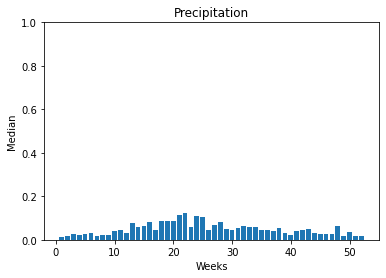

In [ ]:
# ploting effect of precipitation of in 52 weeks of all the given years
plt.bar(week,precipitation_median)
plt.yticks(np.arange(0.0,1.1,0.2))
plt.xlabel('Weeks')
plt.ylabel('Median')
plt.title("Precipitation")
plt.show()

In [ ]:
#solar_radiations_means = list(x_summary.loc['mean'][solar_radiations])
#solar_radiations_means
solar_radiations_median = list(x_median[solar_radiations])

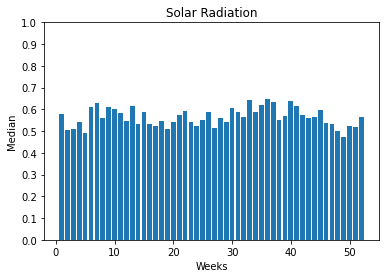

In [ ]:
# ploting effect of precipitation of in 52 weeks of all the given years
plt.bar(week,solar_radiations_median)
plt.yticks(np.arange(0.0,1.1,0.1))
plt.xlabel('Weeks')
plt.ylabel('Median')
plt.title("Solar Radiation")
plt.show()

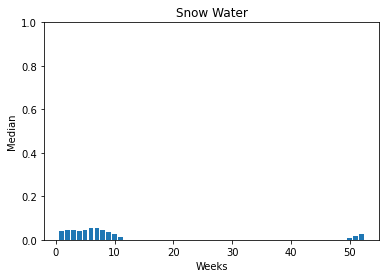

In [ ]:
#snow_water_means = list(x_summary.loc['mean'][snow_water])
snow_water_median = list(x_median[snow_water])
plt.bar(week,snow_water_median)
plt.yticks(np.arange(0.0,1.1,0.2))
plt.xlabel('Weeks')
plt.ylabel('Median')
plt.title("Snow Water")
plt.show()

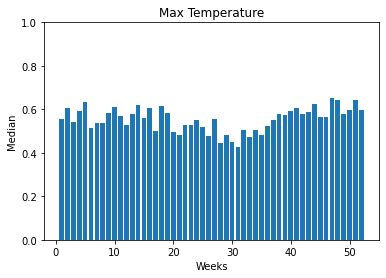

In [ ]:
#max_temp_means = list(x_summary.loc['mean'][max_temp])
max_temp_median = list(x_median[max_temp])
plt.bar(week,max_temp_median)
plt.yticks(np.arange(0.0,1.1,0.2))
plt.xlabel('Weeks')
plt.ylabel('Median')
plt.title("Max Temperature")
plt.show()

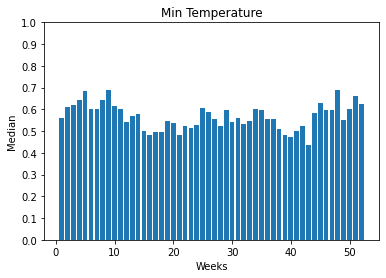

In [ ]:
#min_temp_means = list(x_summary.loc['mean'][min_temp])
min_temp_median = list(x_median[min_temp])
plt.bar(week,min_temp_median)
plt.yticks(np.arange(0.0,1.1,0.1))
plt.xlabel('Weeks')
plt.ylabel('Median')
plt.title("Min Temperature")
plt.show()

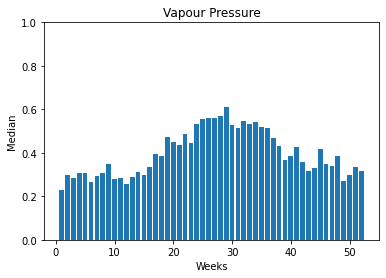

In [ ]:
#vapor_pressure_means = list(x_summary.loc['mean'][vapor_pressure])
vapor_pressure_median = list(x_median[vapor_pressure])
plt.bar(week,vapor_pressure_median)
plt.yticks(np.arange(0.0,1.1,0.2))
plt.xlabel('Weeks')
plt.ylabel('Median')
plt.title("Vapour Pressure")
plt.show()

In [ ]:
"""def Ploting_bar(factors):
  c = 0
  for i in factors:
    c += 1
    means = list(x_summary.loc['mean'][i])
    plt.bar(week,vapor_pressure_means)
    plt.xlabel('Weeks')
    plt.ylabel('Means')
    plt.title("{}".format(c))
    plt.show()"""

'def Ploting_bar(factors):\n  c = 0\n  for i in factors:\n    c += 1\n    means = list(x_summary.loc[\'mean\'][i])\n    plt.bar(week,vapor_pressure_means)\n    plt.xlabel(\'Weeks\')\n    plt.ylabel(\'Means\')\n    plt.title("{}".format(c))\n    plt.show()'

In [ ]:
'''%matplotlib notebook
factors = [precipitation,solar_radiations,snow_water,max_temp,min_temp,vapor_pressure]
Ploting_bar(factors) '''

'%matplotlib notebook\nfactors = [precipitation,solar_radiations,snow_water,max_temp,min_temp,vapor_pressure]\nPloting_bar(factors) '

In [ ]:
bulk_density = ['bdod_mean_0-5cm', 'bdod_mean_5-15cm', 'bdod_mean_15-30cm', 'bdod_mean_30-60cm', 'bdod_mean_60-100cm', 'bdod_mean_100-200cm']
hydraulic_conductivity = ['cec_mean_0-5cm', 'cec_mean_5-15cm', 'cec_mean_15-30cm', 'cec_mean_30-60cm', 'cec_mean_60-100cm', 'cec_mean_100-200cm']
coarse_segment = ['cfvo_mean_0-5cm', 'cfvo_mean_5-15cm', 'cfvo_mean_15-30cm', 'cfvo_mean_30-60cm', 'cfvo_mean_60-100cm', 'cfvo_mean_100-200cm']
percent_clay = ['clay_mean_0-5cm', 'clay_mean_5-15cm', 'clay_mean_15-30cm', 'clay_mean_30-60cm', 'clay_mean_60-100cm', 'clay_mean_100-200cm']
nitogen_density = ['nitrogen_mean_0-5cm', 'nitrogen_mean_5-15cm', 'nitrogen_mean_15-30cm', 'nitrogen_mean_30-60cm', 'nitrogen_mean_60-100cm', 'nitrogen_mean_100-200cm']
org_carbon_density = ['ocd_mean_0-5cm', 'ocd_mean_5-15cm', 'ocd_mean_15-30cm', 'ocd_mean_30-60cm', 'ocd_mean_60-100cm', 'ocd_mean_100-200cm']
org_carbon_stock = ['ocs_mean_0-5cm', 'ocs_mean_5-15cm', 'ocs_mean_15-30cm', 'ocs_mean_30-60cm', 'ocs_mean_60-100cm', 'ocs_mean_100-200cm']
ph_in_H2O = ['phh2o_mean_0-5cm', 'phh2o_mean_5-15cm', 'phh2o_mean_15-30cm', 'phh2o_mean_30-60cm', 'phh2o_mean_60-100cm', 'phh2o_mean_100-200cm']
sand_conc = ['sand_mean_0-5cm', 'sand_mean_5-15cm', 'sand_mean_15-30cm', 'sand_mean_30-60cm', 'sand_mean_60-100cm', 'sand_mean_100-200cm']
silt_conc = ['silt_mean_0-5cm', 'silt_mean_5-15cm', 'silt_mean_15-30cm', 'silt_mean_30-60cm', 'silt_mean_60-100cm', 'silt_mean_100-200cm']
soil_organic_carbon = ['soc_mean_0-5cm', 'soc_mean_5-15cm', 'soc_mean_15-30cm','soc_mean_30-60cm', 'soc_mean_60-100cm', 'soc_mean_100-200cm']
depts = ['0-5','5-15','15-30','30-60','60-100','100-200']

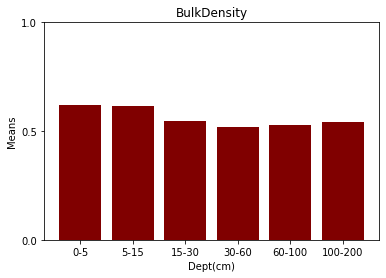

In [ ]:
#bulk density
bulk_den_mean = list(x_summary.loc['mean'][bulk_density])
plt.bar(depts,bulk_den_mean,color = 'maroon')
plt.xticks(depts)
plt.yticks(np.arange(0.0,1.1,0.5))
plt.xlabel('Dept(cm)')
plt.ylabel('Means')
plt.title('BulkDensity')
plt.show()

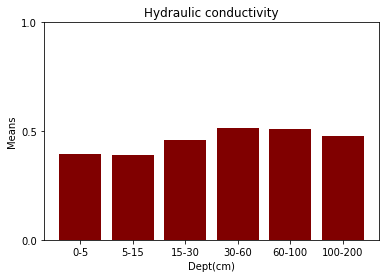

In [ ]:
#conductivity
hydraulic_condu_mean = list(x_summary.loc['mean'][hydraulic_conductivity])
plt.bar(depts,hydraulic_condu_mean,color = 'maroon')
plt.xticks(depts)
plt.yticks(np.arange(0.0,1.1,0.5))
plt.xlabel('Dept(cm)')
plt.ylabel('Means')
plt.title('Hydraulic conductivity')
plt.show()

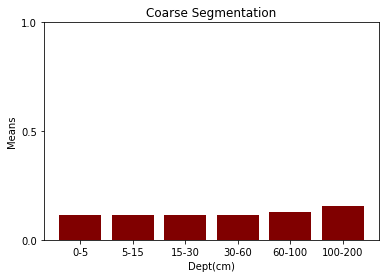

In [ ]:
#coarse_segment
coarse_segment_mean = list(x_summary.loc['mean'][coarse_segment])
plt.bar(depts,coarse_segment_mean,color = 'maroon')
plt.xticks(depts)
plt.yticks(np.arange(0.0,1.1,0.5))
plt.xlabel('Dept(cm)')
plt.ylabel('Means')
plt.title('Coarse Segmentation')
plt.show()

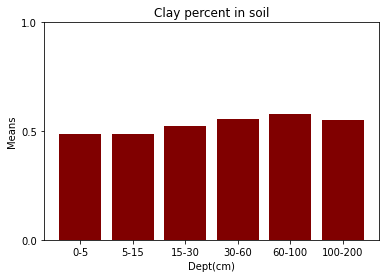

In [ ]:
#percent_clay
percent_clay_mean = list(x_summary.loc['mean'][percent_clay])
plt.bar(depts,percent_clay_mean,color = 'maroon')
plt.xticks(depts)
plt.yticks(np.arange(0.0,1.1,0.5))
plt.xlabel('Dept(cm)')
plt.ylabel('Means')
plt.title('Clay percent in soil')
plt.show()

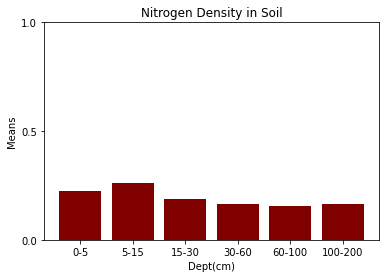

In [ ]:
#nitogen_density
nitogen_density_mean = list(x_summary.loc['mean'][nitogen_density])
plt.bar(depts,nitogen_density_mean,color = 'maroon')
plt.xticks(depts)
plt.yticks(np.arange(0.0,1.1,0.5))
plt.xlabel('Dept(cm)')
plt.ylabel('Means')
plt.title('Nitrogen Density in Soil')
plt.show()

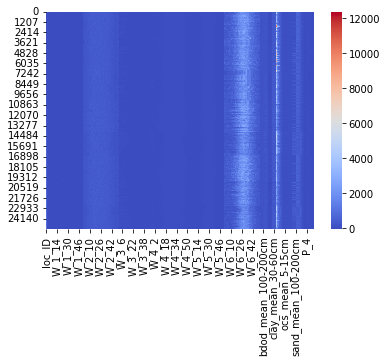

**Applying diffetent ML models and calculating score of predections using *score()* method:**

In [ ]:
def getScoreAndExcTime(model, xTrain, yTrain, xTest, yTest):
  now = time.time()
  model.fit(xTrain, yTrain)
  model_score = model.score(xTest, yTest)
  then = time.time()
  return model_score,(then-now)


In [ ]:
from sklearn.svm import SVR
from sklearn import preprocessing
import numpy as np
import time

In [ ]:
#Algorithms to be used in ML:- SVR, Regression, KNN

#Algorithms to be used in DL:- Sequential


svm_score, exc_time = getScoreAndExcTime(SVR(kernel='rbf'), x_train, y_train, x_test, y_test)


print("The score of SVM model:",svm_score)
print("Execution time:",exc_time)


The score of SVM model: 0.4685484253926702
Execution time: 359.9214618206024


In [ ]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import numpy as np
import time
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_score, exc_time = getScoreAndExcTime(LR_model, x_train, y_train, x_test, y_test)

print("The score of LinearRegression model:",LR_score)
print("Execution Time:",exc_time)
y_predict = LR_model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
rmse = (np.sqrt(mse))

print("The rmse value of Linear Regression:")
print("rmse:",rmse)

The score of LinearRegression model: 0.761943927590949
Execution Time: 0.701348066329956
The rmse value of Linear Regression:
rmse: 5.357031591224219


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNR_model = KNeighborsRegressor(n_neighbors=3)
KNR_score, exc_time = getScoreAndExcTime(KNR_model, x_train, y_train, x_test, y_test)
print("The score of KNeighborsRegressor model:",KNR_score)
print("Execution Time:",exc_time)
y_predict = KNR_model.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
rmse = (np.sqrt(mse))

print("The rmse value of KNeighborRegression is:")
print("rmse:",rmse)

The score of KNeighborsRegressor model: 0.8344927648544587
Execution Time: 4.094610691070557
The rmse value of KNeighborRegression is:
rmse: 4.466764617341132


In [ ]:
from xgboost import XGBRegressor

XGB_model = XGBRegressor()
XGB_score, exc_time = getScoreAndExcTime(XGB_model, x_train, y_train, x_test, y_test)
print("The score of XGBoost model:",XGB_score)
print("Execution Time:",exc_time)
y_predict = XGB_model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
rmse = (np.sqrt(mse))

print("The rmse value of XGBoost model:")
print("rmse:",rmse)

[14:24:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The score of XGBoost model: 0.785722350938766
Execution Time: 36.45978832244873
The rmse value of XGBoost model:
rmse: 5.082448795153601


XGBRegressor()


**Using Cross validation score(**cross_val_score**) :**

In [ ]:
import xgboost

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:

scores_svr = []
exc_time_svr = []
scores_LR = []
exc_time_LR = []
scores_KNR = []
exc_time_KNR = []
scores_XGB = []
exc_time_XGB = []

for train_index, test_index in kf.split(x):
  x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  #scr, e_time = getScoreAndExcTime(SVR(kernel='rbf'), x_train, y_train, x_test, y_test)
  #scores_svr.append(scr),exc_time_svr.append(e_time)

  #scr, e_time = getScoreAndExcTime(LinearRegression(),x_train, y_train, x_test, y_test)
  #scores_LR.append(scr),exc_time_LR.append(e_time)

  #scr, e_time = getScoreAndExcTime(KNeighborsRegressor(n_neighbors=5),x_train, y_train, x_test, y_test)
  #scores_KNR.append(scr),exc_time_KNR.append(e_time)
  
  scr, e_time = getScoreAndExcTime(XGBRegressor(),x_train,y_train,x_test,y_test)
  scores_XGB.append(scr),exc_time_XGB.append(e_time)

[09:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:08:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:11:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
scores_LR, exc_time_LR

([0.7406108211799924,
  0.8035999837349768,
  0.69493337527553,
  0.7447102925688681,
  0.588153261982653,
  0.4000861217913312,
  -7.593314280876237,
  0.7030322310712598,
  0.42163645648307757,
  0.1368040531367457],
 [0.7557864189147949,
  0.7610297203063965,
  0.7183008193969727,
  0.7289810180664062,
  0.7394800186157227,
  0.717010498046875,
  0.7287876605987549,
  0.7280054092407227,
  0.7266590595245361,
  0.7224643230438232])

In [ ]:
scores_KNR, exc_time_KNR

([0.7898726705503679,
  0.8538655519735141,
  0.8075744723653348,
  0.7776037889838588,
  0.68987585831609,
  0.5678523612511557,
  0.8576021969063576,
  0.726981602009398,
  0.4574509137965716,
  0.11131707863911322],
 [10.31049132347107,
  10.121450424194336,
  11.080061674118042,
  12.409989356994629,
  13.668725967407227,
  12.688421487808228,
  12.233315229415894,
  12.63304328918457,
  17.40177822113037,
  19.822417736053467])

In [ ]:
scores_XGB,exc_time_XGB

([0.7112010171993074,
  0.7468055865047518,
  0.7108775174274182,
  0.7236985620711314,
  0.6661803497713499,
  0.5667083380078006,
  0.7362670787497414,
  0.6914358280368763,
  0.2618313876876215,
  0.1789444803530017],
 [39.65882182121277,
  39.689714193344116,
  39.74274182319641,
  39.45111417770386,
  39.15697193145752,
  39.63970899581909,
  39.34693241119385,
  39.26794195175171,
  39.151121616363525,
  39.19136452674866])

In [ ]:
from sklearn.model_selection import cross_val_score as cv_scoring

In [ ]:
cross_val_score(LinearRegression(),x,y)


array([ 0.68932571,  0.69920238,  0.35109806, -3.86766853,  0.5918525 ])

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=5),x,y)

array([0.64092104, 0.71900983, 0.36730121, 0.56292753, 0.49855481])

In [ ]:
cross_val_score(KNeighborsRegressor(n_neighbors=3),x,y)

array([0.63616492, 0.74012601, 0.36262645, 0.57324331, 0.51384857])

In [ ]:
cross_val_score(XGBRegressor(),x,y)

[09:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.6082163 , 0.69987173, 0.50905271, 0.6325704 , 0.45307426])